In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### reading csv file using panda 
df = pd.read_csv(r'Scenario-A-merged_5s.csv')

In [3]:
# displaying the first five rows of the dataset
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [40]:
# displaying last 5 records of the dataset
df.tail()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
84189,131.202.240.183,7116,239.255.255.250,1900,17,0,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
84190,131.202.240.87,11365,31.13.73.1,443,6,0,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
84191,10.0.2.15,51024,37.97.149.8,443,6,0,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,TOR
84192,131.202.6.26,13000,131.202.240.87,64584,6,0,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
84193,38.124.168.119,80,131.202.240.87,65089,6,0,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


## **Exploratory Data Analysis (EDA)**

**Let's understand more about the data**

In [5]:
# Let's check the shape of the dataset
df.shape

(84194, 29)

**There are 84194 records and 29 features in our dataset**

In [6]:
# getting the columns of the dataset
df.columns

Index(['Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean',
       ' Idle Std', ' Idle Max', ' Idle Min', 'label'],
      dtype='object')

In [7]:
#total missing data
train_total = df.isnull().sum()
train_percent= ((df.isnull().sum()/df.shape[0])*100)

data_missing= pd.DataFrame({'train total':train_total, 'train percent': train_percent})
data_missing.sort_values(by='train total', ascending=False).head()

,train total,train percent
Flow Bytes/s,2,0.002375
Source IP,0,0.000000
Fwd IAT Min,0,0.000000
Idle Min,0,0.000000
Idle Max,0,0.000000


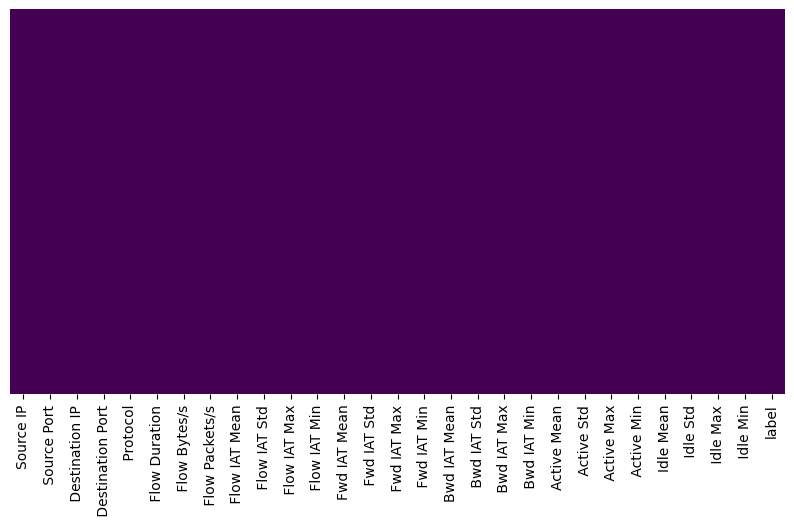

In [8]:
# plot the line plot to show the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [9]:
# checking the datatypes of the columns
df.dtypes

Source IP             object
 Source Port           int64
 Destination IP       object
 Destination Port      int64
 Protocol              int64
 Flow Duration         int64
 Flow Bytes/s        float64
 Flow Packets/s      float64
 Flow IAT Mean       float64
 Flow IAT Std        float64
 Flow IAT Max          int64
 Flow IAT Min          int64
Fwd IAT Mean         float64
 Fwd IAT Std         float64
 Fwd IAT Max           int64
 Fwd IAT Min           int64
Bwd IAT Mean         float64
 Bwd IAT Std         float64
 Bwd IAT Max           int64
 Bwd IAT Min           int64
Active Mean            int64
 Active Std            int64
 Active Max            int64
 Active Min            int64
Idle Mean              int64
 Idle Std              int64
 Idle Max              int64
 Idle Min              int64
label                 object
dtype: object

In [10]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84194 entries, 0 to 84193
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source IP          84194 non-null  object 
 1    Source Port       84194 non-null  int64  
 2    Destination IP    84194 non-null  object 
 3    Destination Port  84194 non-null  int64  
 4    Protocol          84194 non-null  int64  
 5    Flow Duration     84194 non-null  int64  
 6    Flow Bytes/s      84192 non-null  float64
 7    Flow Packets/s    84194 non-null  float64
 8    Flow IAT Mean     84194 non-null  float64
 9    Flow IAT Std      84194 non-null  float64
 10   Flow IAT Max      84194 non-null  int64  
 11   Flow IAT Min      84194 non-null  int64  
 12  Fwd IAT Mean       84194 non-null  float64
 13   Fwd IAT Std       84194 non-null  float64
 14   Fwd IAT Max       84194 non-null  int64  
 15   Fwd IAT Min       84194 non-null  int64  
 16  Bwd IAT Mean       841

In [11]:
# statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,84194.0,3.654866e+04,2.151457e+04,21.0,15685.000000,42381.000000,5.442000e+04,6.553400e+04
Destination Port,84194.0,1.316068e+04,1.954948e+04,21.0,137.000000,443.000000,1.930200e+04,6.551400e+04
Protocol,84194.0,1.170904e+01,5.496059e+00,6.0,6.000000,17.000000,1.700000e+01,1.700000e+01
Flow Duration,84194.0,1.976443e+06,2.143432e+06,0.0,111061.500000,420762.500000,4.838636e+06,5.000000e+06
Flow Bytes/s,84192.0,inf,NaN,0.0,106.814135,1952.058369,2.596406e+04,inf
Flow Packets/s,84194.0,inf,NaN,0.4,4.874711,29.662164,1.040035e+02,inf
Flow IAT Mean,84194.0,2.345857e+05,5.300413e+05,0.0,9873.663043,46524.500000,3.334988e+05,5.000000e+06
Flow IAT Std,84194.0,1.060288e+05,2.847677e+05,0.0,0.000000,3953.863076,4.637779e+04,3.535258e+06
Flow IAT Max,84194.0,5.085555e+05,8.607729e+05,0.0,35375.750000,155687.000000,4.427632e+05,5.000000e+06
Flow IAT Min,84194.0,1.692679e+05,5.012712e+05,-2255.0,19.000000,493.000000,1.358822e+05,5.000000e+06


In [12]:
# checking the unique values of the dataset
df.nunique()

Source IP              766
 Source Port         17572
 Destination IP       1734
 Destination Port     2138
 Protocol                2
 Flow Duration       61846
 Flow Bytes/s        66098
 Flow Packets/s      67109
 Flow IAT Mean       67060
 Flow IAT Std        45060
 Flow IAT Max        61825
 Flow IAT Min        28776
Fwd IAT Mean         51958
 Fwd IAT Std         41176
 Fwd IAT Max         48483
 Fwd IAT Min         22745
Bwd IAT Mean         35733
 Bwd IAT Std         33962
 Bwd IAT Max         32975
 Bwd IAT Min         10058
Active Mean           2698
 Active Std              1
 Active Max           2698
 Active Min           2698
Idle Mean             3597
 Idle Std                1
 Idle Max             3597
 Idle Min             3597
label                    2
dtype: int64

In [128]:
# ### VIF it is use to check multicollinearity values >5 or 10 then multicollinearity.

# import pandas as pd
# import numpy as np
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Assuming 'df' is your dataframe with predictors and target
# # Select only the numeric columns if needed
# numeric_cols = df.select_dtypes(include=np.number).columns

# # Calculate VIF for each predictor
# vif_data = pd.DataFrame()
# vif_data["Feature"] = numeric_cols
# vif_data["VIF"] = [variance_inflation_factor(df[numeric_cols].values, i) for i in range(len(numeric_cols))]

# print(vif_data)


In [13]:
# import plotly 
import plotly.express as px
#Number of Unique Values
unique_values= df.select_dtypes(include='number').nunique()

fig = px.bar(unique_values, title='Number of Unique Values', labels = {'x':'', 'y':'Features'}, log_y=True)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(showlegend=False)

In [14]:
#Check Number of Duplicates
n_duplicates = df.duplicated().sum()
print(f'We have {n_duplicates} duplicates in our dataset')

We have 493 duplicates in our dataset


In [15]:
# getting the colun names 
df.columns

Index(['Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean',
       ' Idle Std', ' Idle Max', ' Idle Min', 'label'],
      dtype='object')

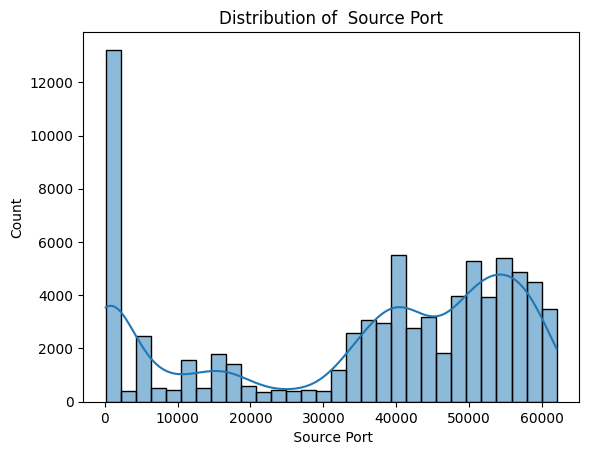

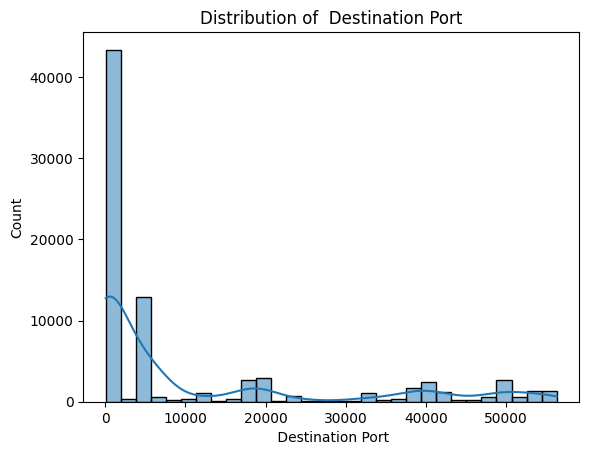

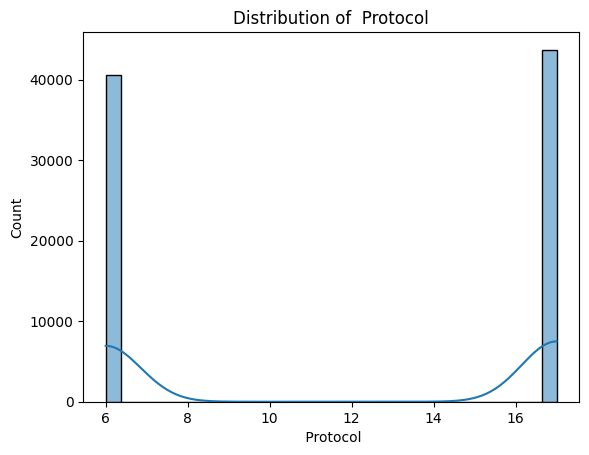

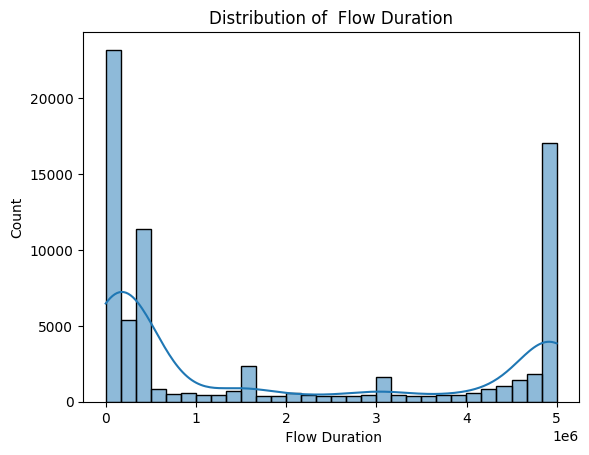

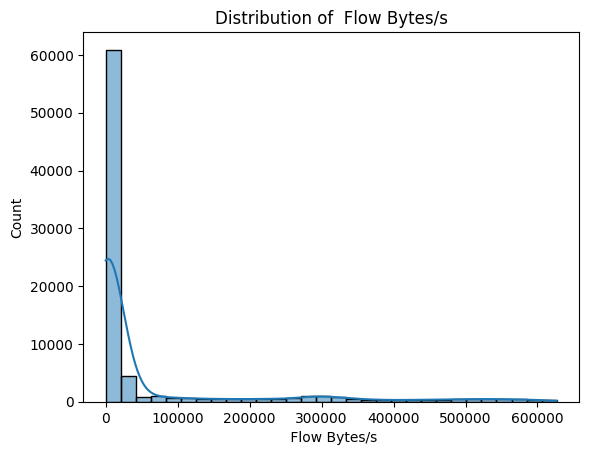

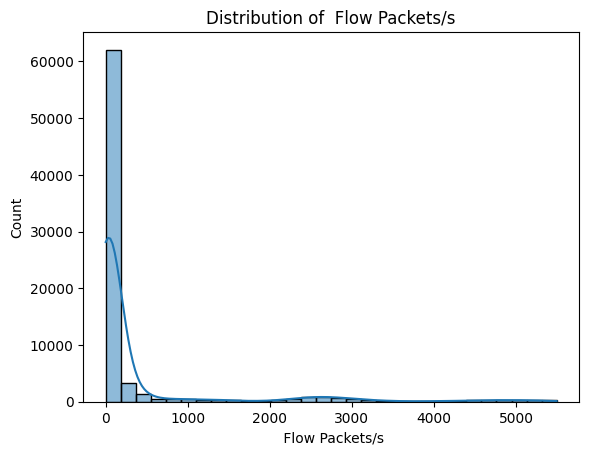

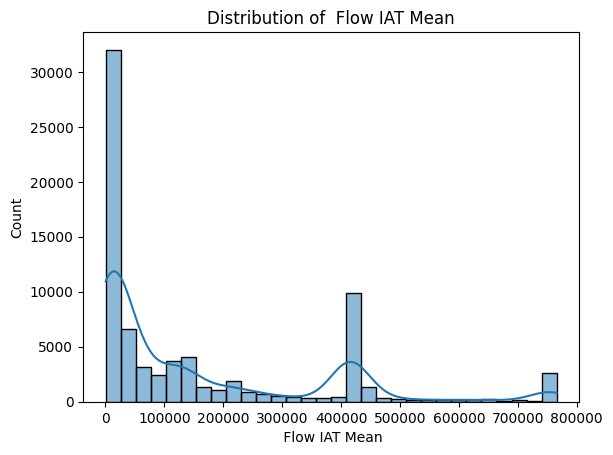

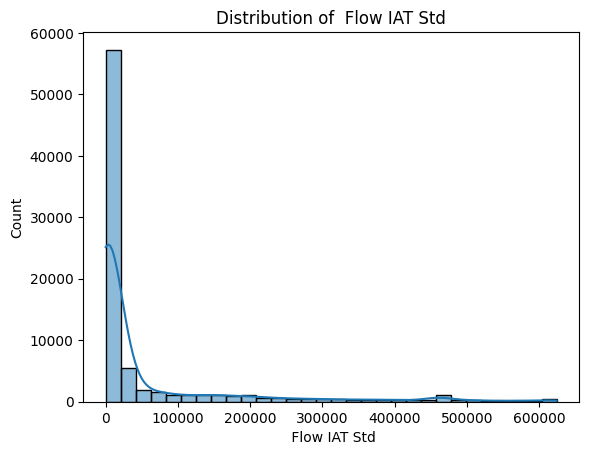

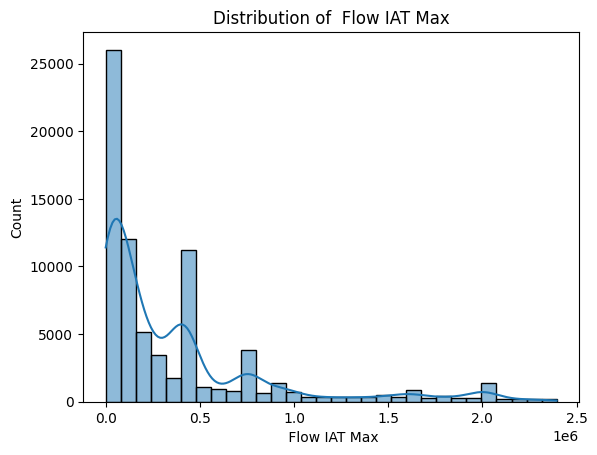

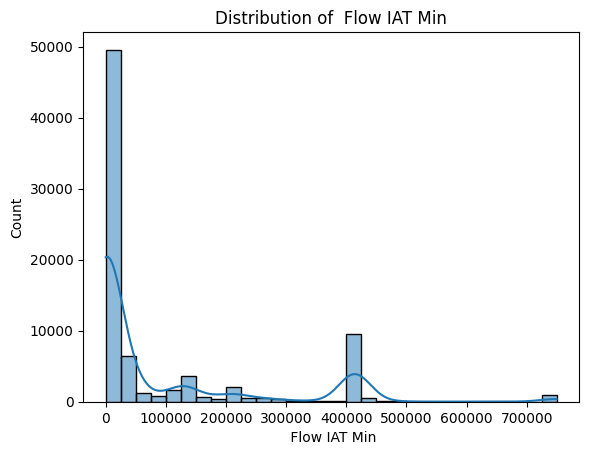

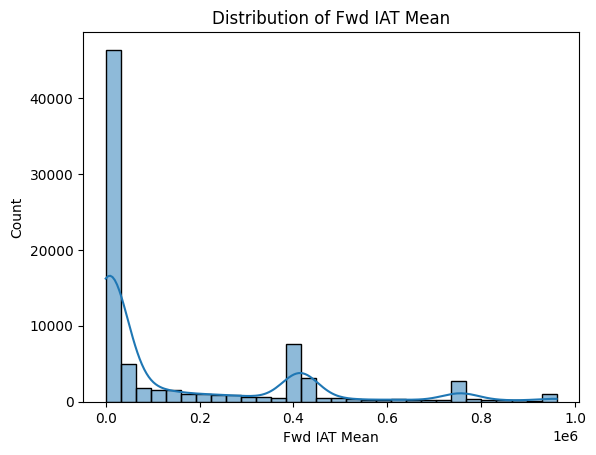

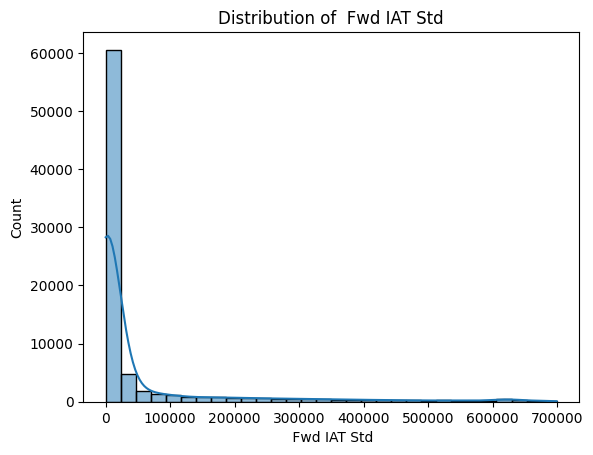

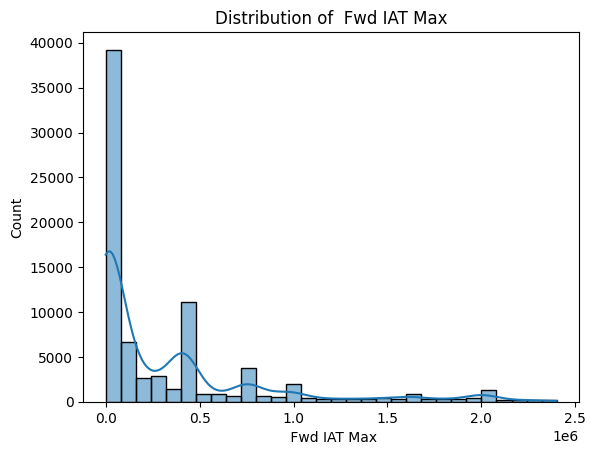

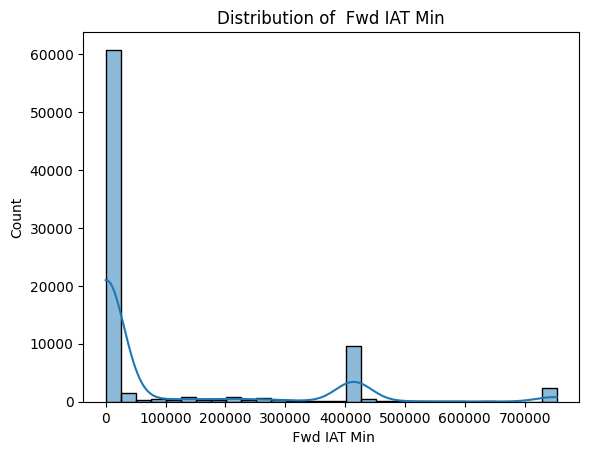

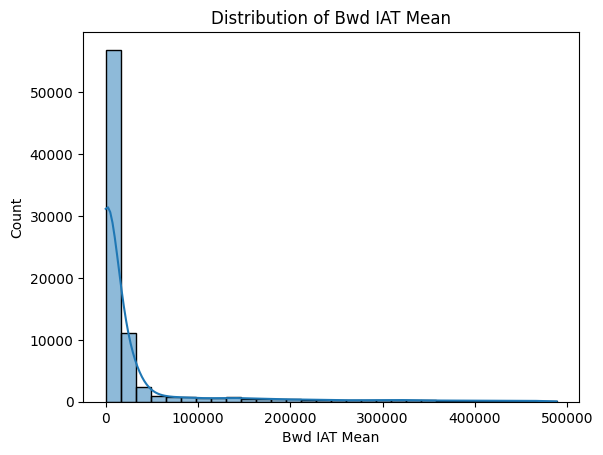

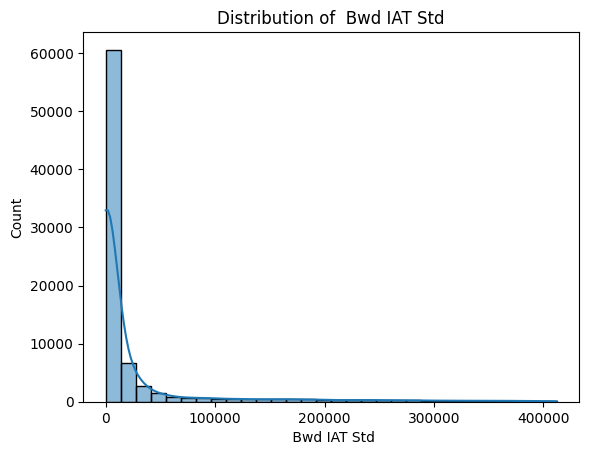

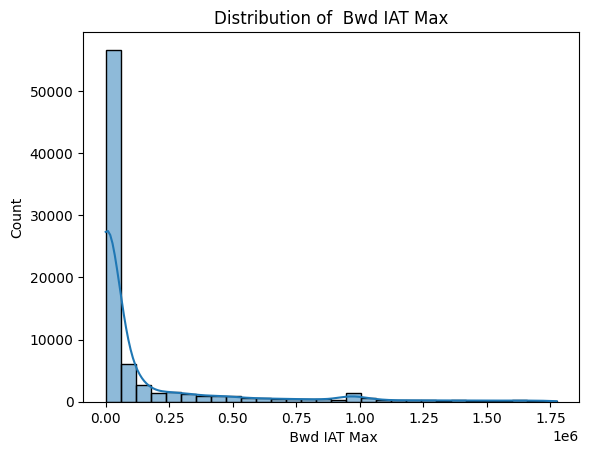

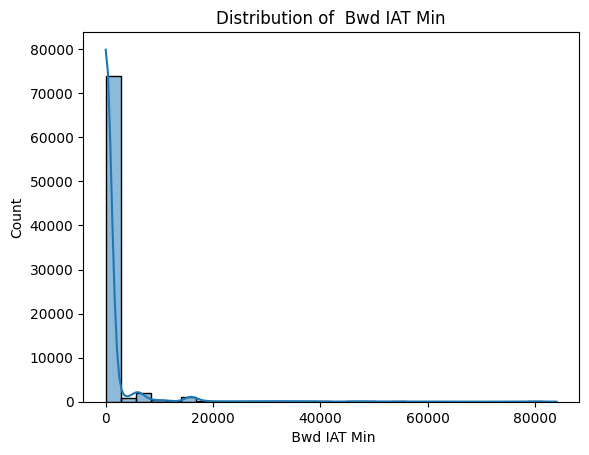

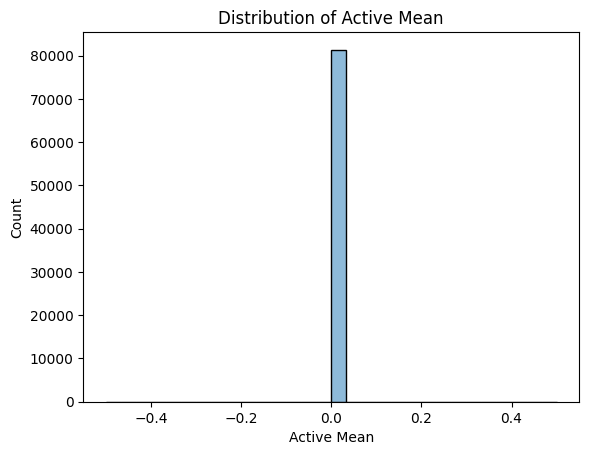

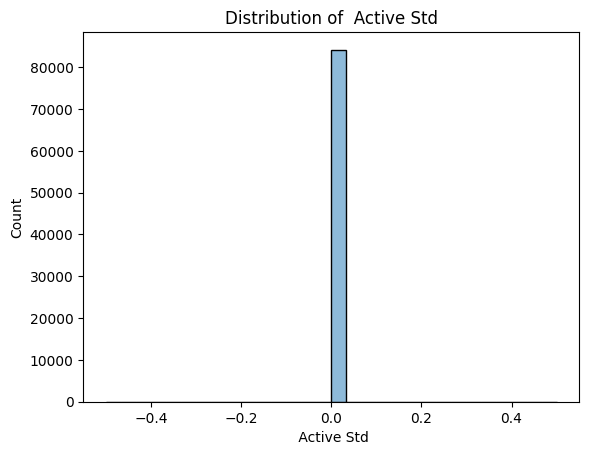

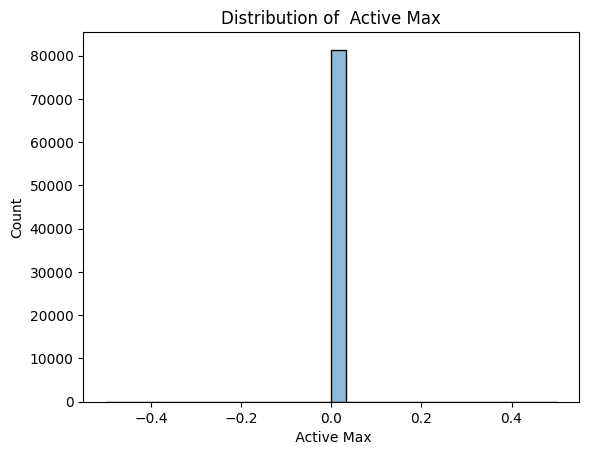

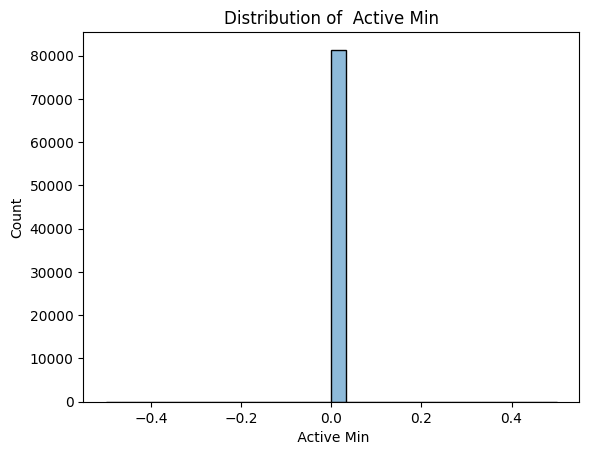

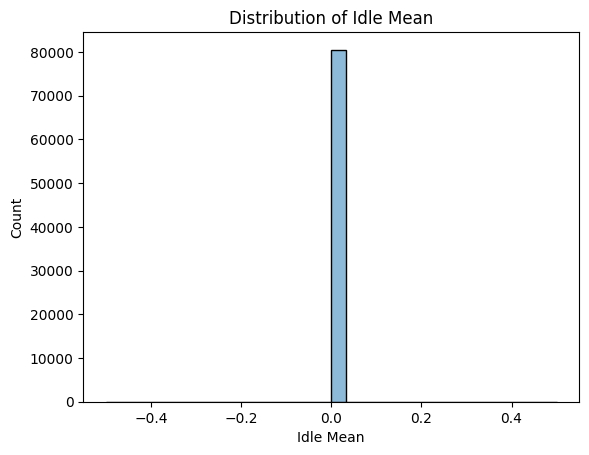

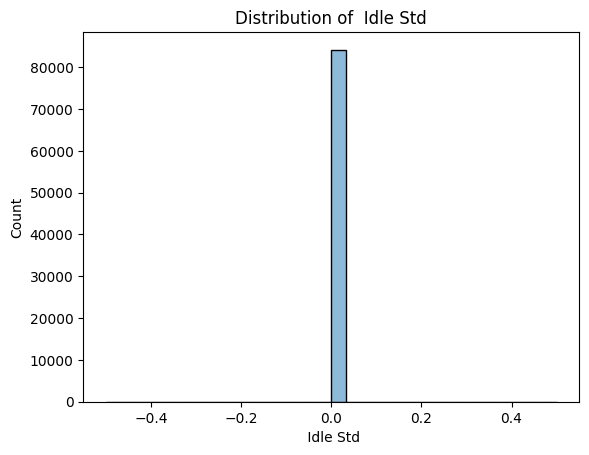

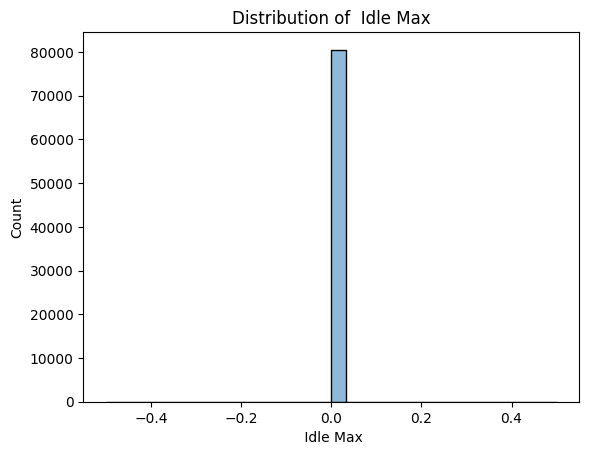

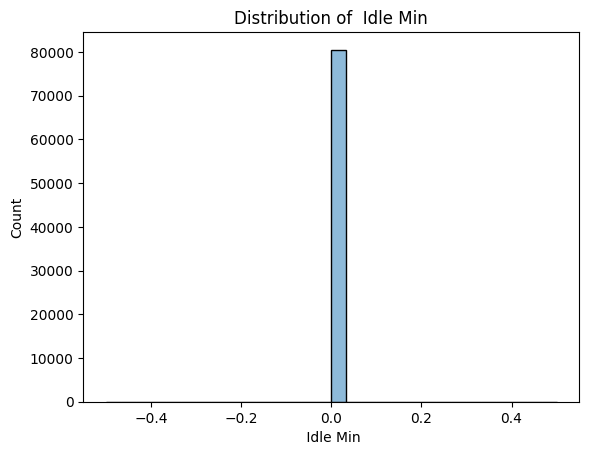

In [16]:
# Assuming df is your dataframe
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    # Handle extreme values or NaNs
    data = df[col].dropna()
    data = data[(data >= data.quantile(0.05)) & (data <= data.quantile(0.95))]  # Remove extreme outliers
    
    # Plotting with customized bins and KDE bandwidth
    sns.histplot(data, bins=30, kde=True, kde_kws={'bw_adjust': 1.5})
    plt.title(f'Distribution of {col}')
    plt.show()

## **Data preprocessing**

In [17]:
# printing the first 5 rows of the dataset
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


### **Dealing with Null values**

In [41]:
# checking the null values 
df.isnull().sum()

Source IP            0
 Source Port         0
 Destination IP      0
 Destination Port    0
 Protocol            0
 Flow Duration       0
 Flow Bytes/s        7
 Flow Packets/s      7
 Flow IAT Mean       0
 Flow IAT Std        0
 Flow IAT Max        0
 Flow IAT Min        0
Fwd IAT Mean         0
 Fwd IAT Std         0
 Fwd IAT Max         0
 Fwd IAT Min         0
Bwd IAT Mean         0
 Bwd IAT Std         0
 Bwd IAT Max         0
 Bwd IAT Min         0
Active Mean          0
 Active Std          0
 Active Max          0
 Active Min          0
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
label                0
dtype: int64

In [42]:
# shape of the dataset 
df.shape

(84194, 29)

In [4]:
df[" Flow Bytes/s"].fillna(df[" Flow Bytes/s"].mode()[0], inplace=True)

In [5]:

df[" Flow Packets/s"].fillna(df[" Flow Packets/s"].mean(), inplace=True)

In [6]:
# checking the null values 
df.isnull().sum().sum()

0

In [7]:
df.drop_duplicates(inplace=True)

In [53]:
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [8]:
df.drop(['Source IP',' Destination IP'], axis=1, inplace=True)

In [55]:
df.head(2)

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,53913,80,6,435,0.0,4597.701149,435.0,0.0,435,435,...,0,0,0,0,0,0,0,0,0,nonTOR
1,53913,80,6,259,0.0,7722.007722,259.0,0.0,259,259,...,0,0,0,0,0,0,0,0,0,nonTOR


In [56]:
# printing the correlation matrix of the dataset 
df.corr()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Source Port,1.000000,-0.360751,0.037644,-0.215983,-0.018438,-0.036337,-0.055825,-0.071223,-0.053687,-0.022097,...,0.030977,0.037743,-0.034146,NaN,-0.034146,-0.034146,0.004171,NaN,0.004171,0.004171
Destination Port,-0.360751,1.000000,-0.074615,0.326988,0.006033,0.036867,-0.016790,0.050592,0.022381,-0.039287,...,0.080880,0.066384,0.006205,NaN,0.006205,0.006205,0.055846,NaN,0.055846,0.055846
Protocol,0.037644,-0.074615,1.000000,-0.233005,-0.022164,-0.040670,0.256125,-0.105694,-0.050579,0.282919,...,-0.312973,-0.028431,-0.063725,NaN,-0.063725,-0.063725,-0.050568,NaN,-0.050568,-0.050568
Flow Duration,-0.215983,0.326988,-0.233005,1.000000,-0.026000,-0.055854,0.114110,0.283836,0.363003,0.022324,...,0.374948,0.111366,0.160685,NaN,0.160685,0.160685,0.242653,NaN,0.242653,0.242653
Flow Bytes/s,-0.018438,0.006033,-0.022164,-0.026000,1.000000,0.564821,-0.027687,-0.022351,-0.029245,-0.021148,...,-0.015041,-0.009393,-0.005825,NaN,-0.005825,-0.005825,-0.010911,NaN,-0.010911,-0.010911
Flow Packets/s,-0.036337,0.036867,-0.040670,-0.055854,0.564821,1.000000,-0.028836,-0.023941,-0.037417,-0.021969,...,-0.024662,-0.009721,-0.008243,NaN,-0.008243,-0.008243,-0.013221,NaN,-0.013221,-0.013221
Flow IAT Mean,-0.055825,-0.016790,0.256125,0.114110,-0.027687,-0.028836,1.000000,0.302323,0.676164,0.937036,...,0.001717,0.105964,0.070930,NaN,0.070930,0.070930,0.545767,NaN,0.545767,0.545767
Flow IAT Std,-0.071223,0.050592,-0.105694,0.283836,-0.022351,-0.023941,0.302323,1.000000,0.720556,-0.031057,...,0.534463,0.409917,0.313568,NaN,0.313568,0.313568,0.501430,NaN,0.501430,0.501430
Flow IAT Max,-0.053687,0.022381,-0.050579,0.363003,-0.029245,-0.037417,0.676164,0.720556,1.000000,0.490446,...,0.653535,0.231706,0.401431,NaN,0.401431,0.401431,0.795177,NaN,0.795177,0.795177
Flow IAT Min,-0.022097,-0.039287,0.282919,0.022324,-0.021148,-0.021969,0.937036,-0.031057,0.490446,1.000000,...,-0.132862,-0.043006,-0.008121,NaN,-0.008121,-0.008121,0.446522,NaN,0.446522,0.446522


<Axes: >

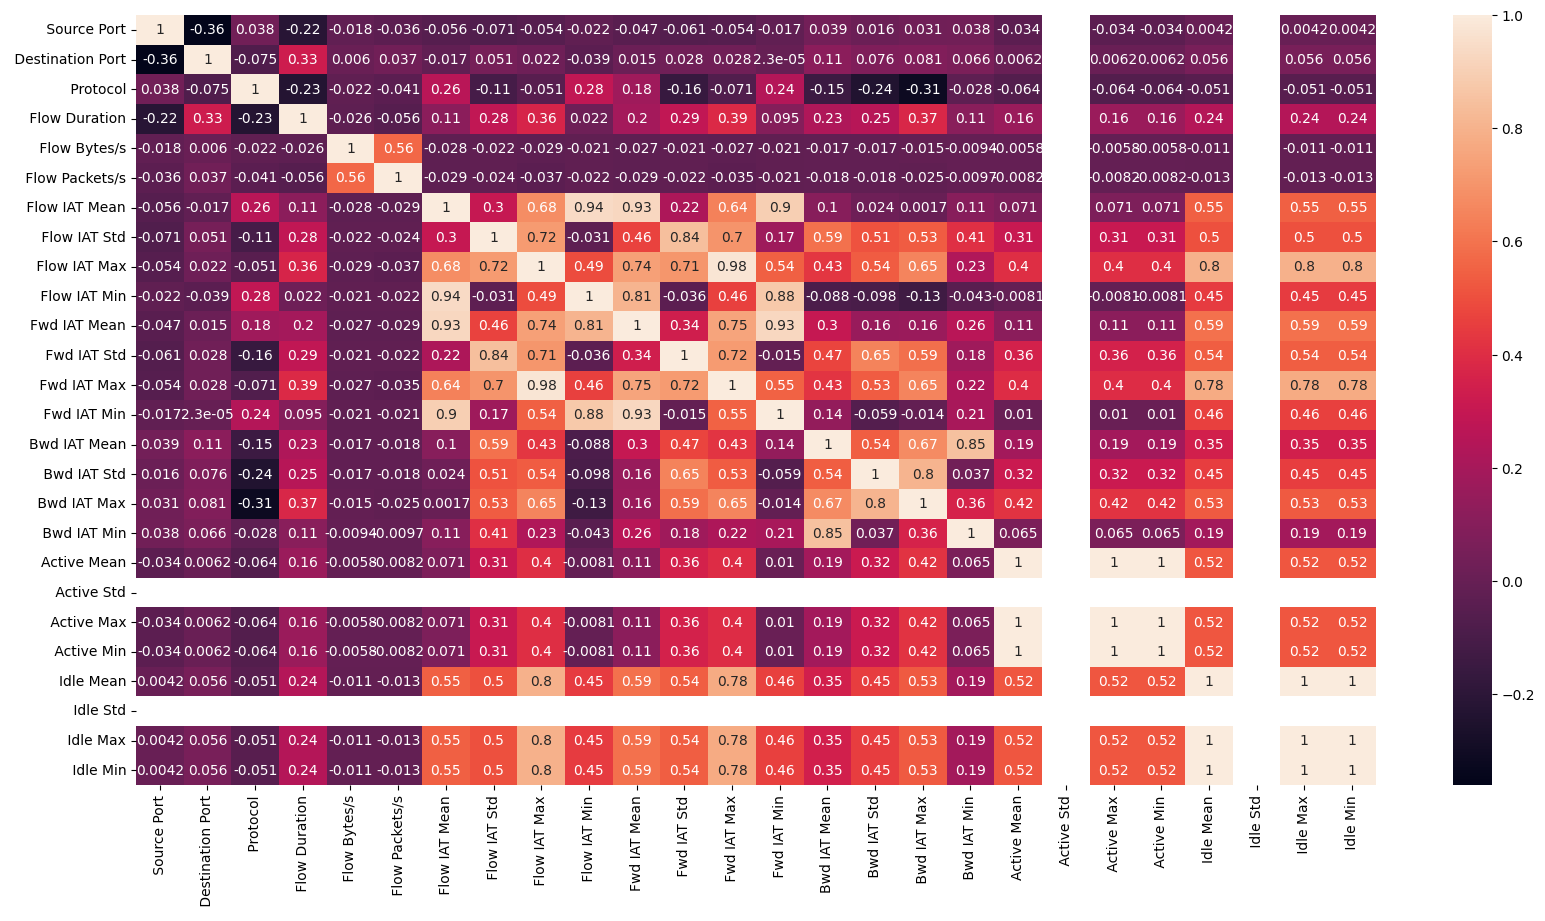

In [27]:
# plot the correlation matrix of the dataset
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [29]:
# # plot the pair plot for the dataset
# sns.pairplot(df, hue='label')

### **Splitting the data into Training and Testing**

In [9]:
df['label'].value_counts().to_dict()

{'nonTOR': 69223, 'TOR': 14478}

In [10]:
df['label'].replace({'nonTOR': 0, 'TOR': 1}, inplace=True)

In [11]:
# Assigning the independent and dependent variables
x = df.drop(['label'],axis=1)
y = df['label']

**here we can see the data is inbalance we have to balance data**

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
x, y = sm.fit_resample(x , y)

In [15]:
### Here i splitt the data into Training And Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((96912, 26), (41534, 26), (96912,), (41534,))

**here we selected importance columns only**

In [78]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.43269368, 0.46177716, 0.29820319, 0.31030752, 0.34371027,
       0.27205016, 0.31033532, 0.30572708, 0.27690311, 0.32139431,
       0.34878936, 0.33470936, 0.33955214, 0.1945658 , 0.38170082,
       0.35374257, 0.37586236, 0.23563141, 0.00404016, 0.        ,
       0.00402523, 0.00600649, 0.00516905, 0.        , 0.00609444,
       0.00457153])

In [79]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

 Destination Port    0.461777
 Source Port         0.432694
Bwd IAT Mean         0.381701
 Bwd IAT Max         0.375862
 Bwd IAT Std         0.353743
Fwd IAT Mean         0.348789
 Flow Bytes/s        0.343710
 Fwd IAT Max         0.339552
 Fwd IAT Std         0.334709
 Flow IAT Min        0.321394
 Flow IAT Mean       0.310335
 Flow Duration       0.310308
 Flow IAT Std        0.305727
 Protocol            0.298203
 Flow IAT Max        0.276903
 Flow Packets/s      0.272050
 Bwd IAT Min         0.235631
 Fwd IAT Min         0.194566
 Idle Max            0.006094
 Active Min          0.006006
Idle Mean            0.005169
 Idle Min            0.004572
Active Mean          0.004040
 Active Max          0.004025
 Active Std          0.000000
 Idle Std            0.000000
dtype: float64

<Axes: >

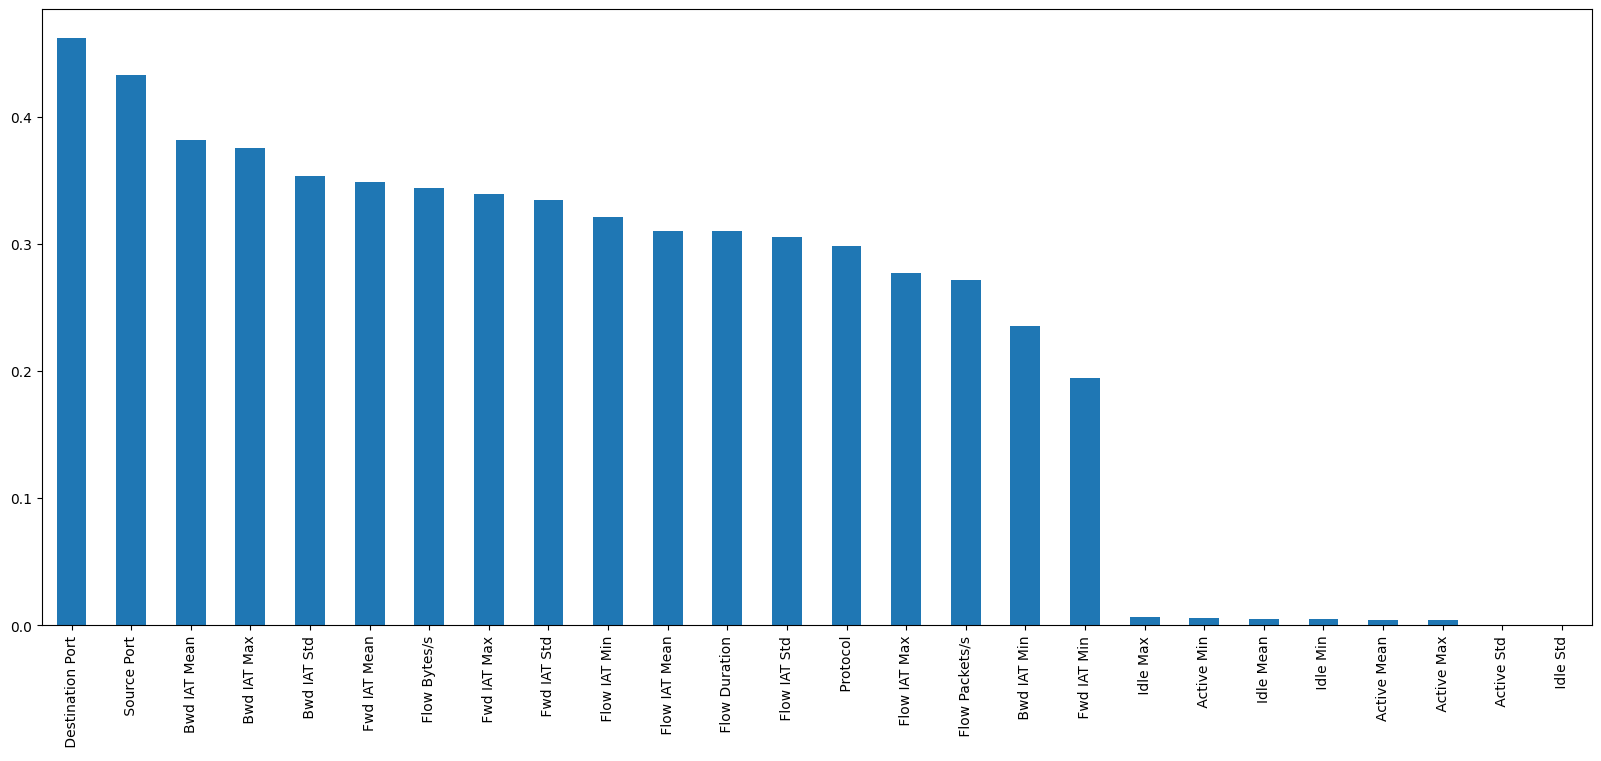

In [80]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [81]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 18 important features
sel_18_cols = SelectKBest(mutual_info_classif, k=18)
sel_18_cols.fit(x_train, y_train)
x_train.columns[sel_18_cols.get_support()]

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min'],
      dtype='object')

In [16]:
x_train = x_train[[' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min']]

In [17]:
x_test = x_test[[' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min']]

## **Model Building**

**Decision Tree**

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = dt.predict(x_train)
acc_dt = accuracy_score(y_train, y_pred) * 100
pre_dt = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_dt = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_dt = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_dt}%")
print(f"Precision : {pre_dt}%")
print(f"Recall : {recall_dt}%")
print(f"F1 Score : {f1_dt}%")

Accuracy: 100.0%
Precision : 100.0%
Recall : 100.0%
F1 Score : 100.0%


<Axes: >

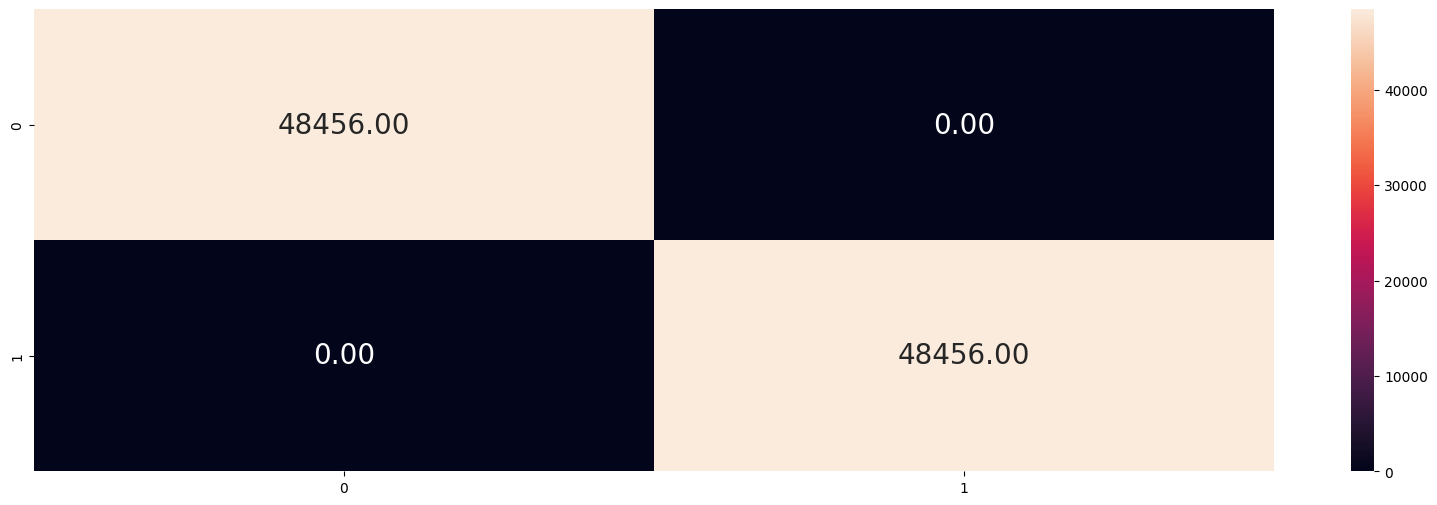

In [86]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

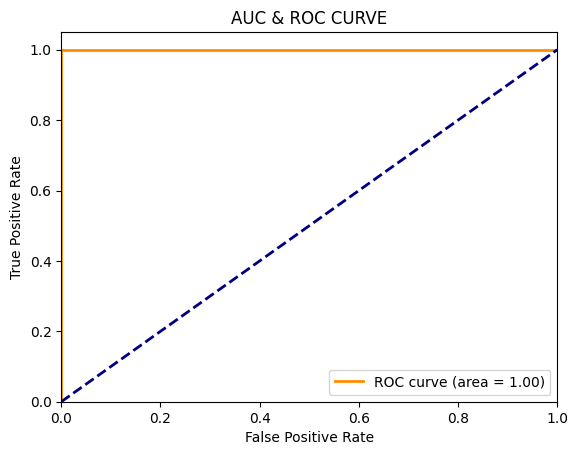

In [87]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [88]:
y_pred = dt.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred) * 100
pre_dt = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_dt = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_dt = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_dt}%")
print(f"Precision : {pre_dt}%")
print(f"Recall : {recall_dt}%")
print(f"F1 Score : {f1_dt}%")

Accuracy: 99.19343188712861%
Precision : 99.19343291373065%
Recall : 99.19343188712861%
F1 Score : 99.19343188292062%


<Axes: >

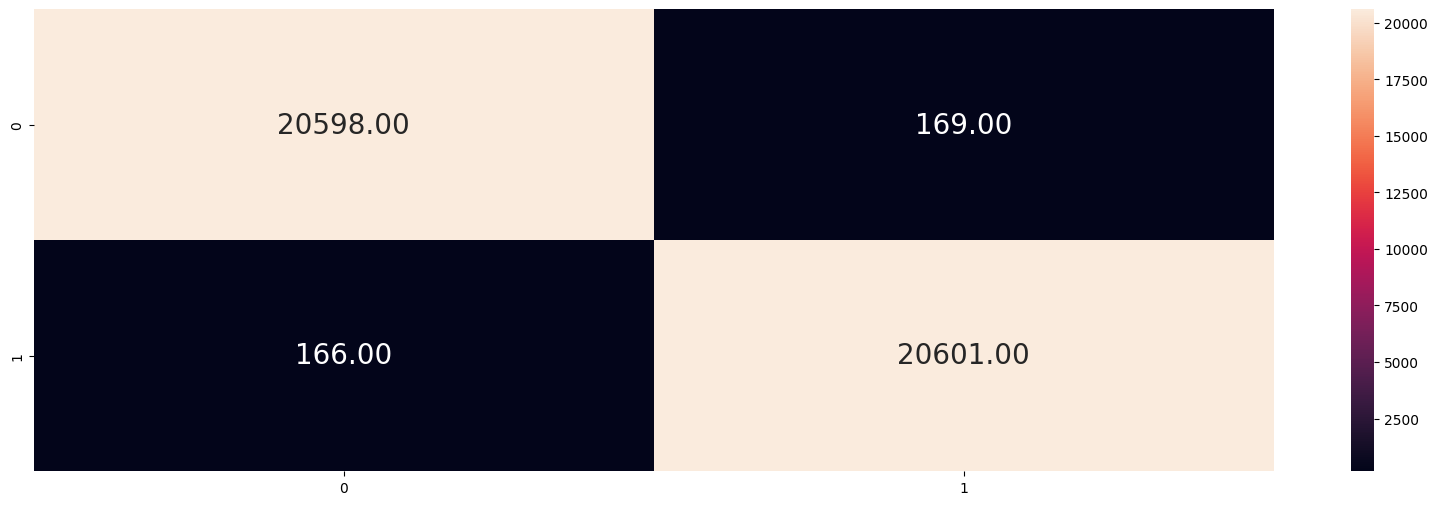

In [89]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

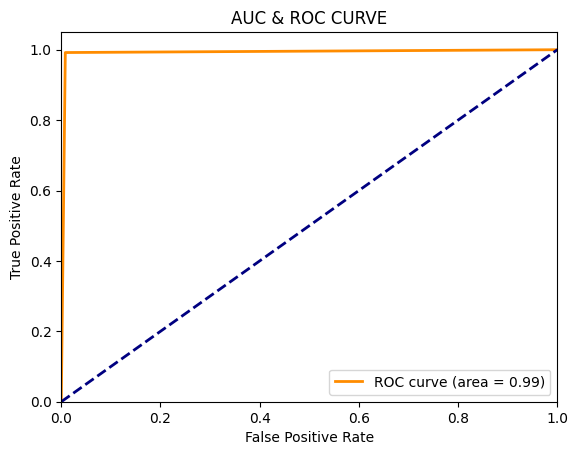

In [90]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Logistic Regression**

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [92]:
y_pred = lr.predict(x_train)
acc_lr = accuracy_score(y_train, y_pred) * 100
pre_lr = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_lr = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_lr = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_lr}%")
print(f"Precision : {pre_lr}%")
print(f"Recall : {recall_lr}%")
print(f"F1 Score : {f1_lr}%")

Accuracy: 85.16798745253425%
Precision : 85.27110355974578%
Recall : 85.16798745253425%
F1 Score : 85.1571390675621%


<Axes: >

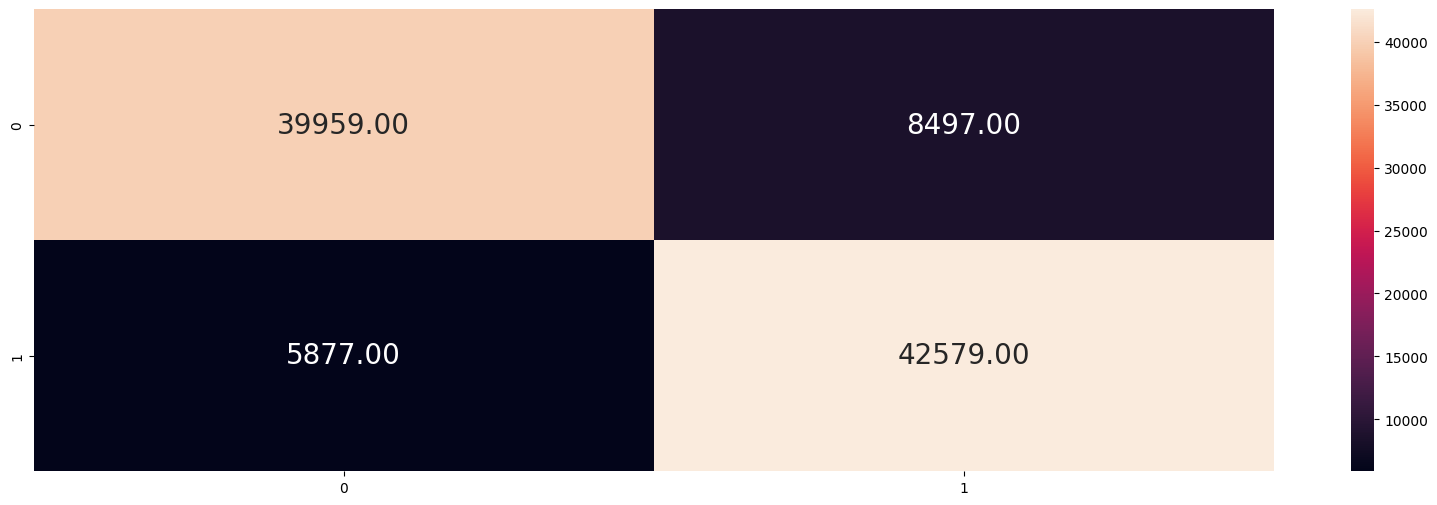

In [93]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

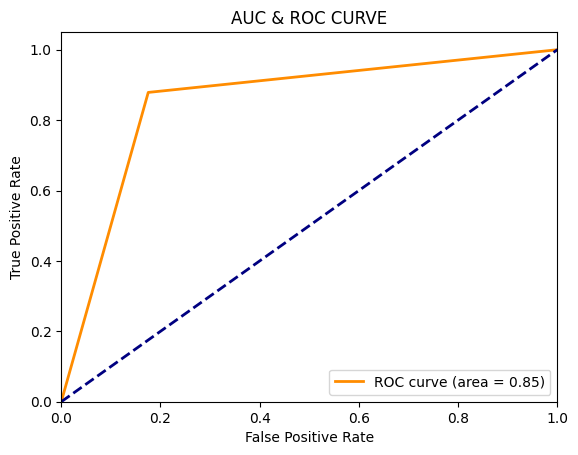

In [94]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [95]:
y_pred = lr.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred) * 100
pre_lr = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_lr = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_lr = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_lr}%")
print(f"Precision : {pre_lr}%")
print(f"Recall : {recall_lr}%")
print(f"F1 Score : {f1_lr}%")

Accuracy: 84.94004911638658%
Precision : 85.0522623975551%
Recall : 84.94004911638658%
F1 Score : 84.92798655632163%


<Axes: >

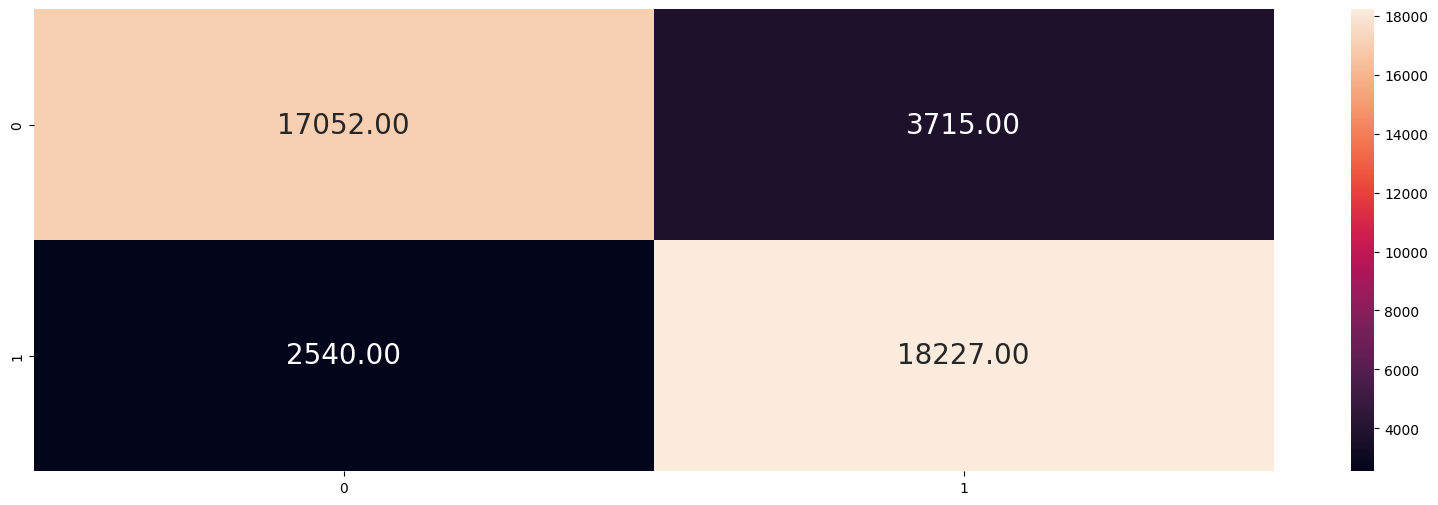

In [96]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

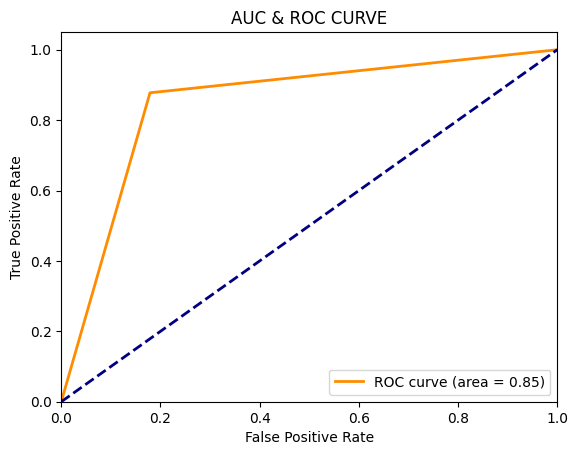

In [97]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

In [98]:
import xgboost as xgb
boost = xgb.XGBClassifier()
boost.fit(x_train, y_train)

XGBClassifier()

In [99]:
y_pred = boost.predict(x_train)
acc_boost = accuracy_score(y_train, y_pred) * 100
pre_boost = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_boost = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_boost = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_boost}%")
print(f"Precision : {pre_boost}%")
print(f"Recall : {recall_boost}%")
print(f"F1 Score : {f1_boost}%")

Accuracy: 97.95381376919266%
Precision : 97.96334295359127%
Recall : 97.95381376919268%
F1 Score : 97.95371213191497%


<Axes: >

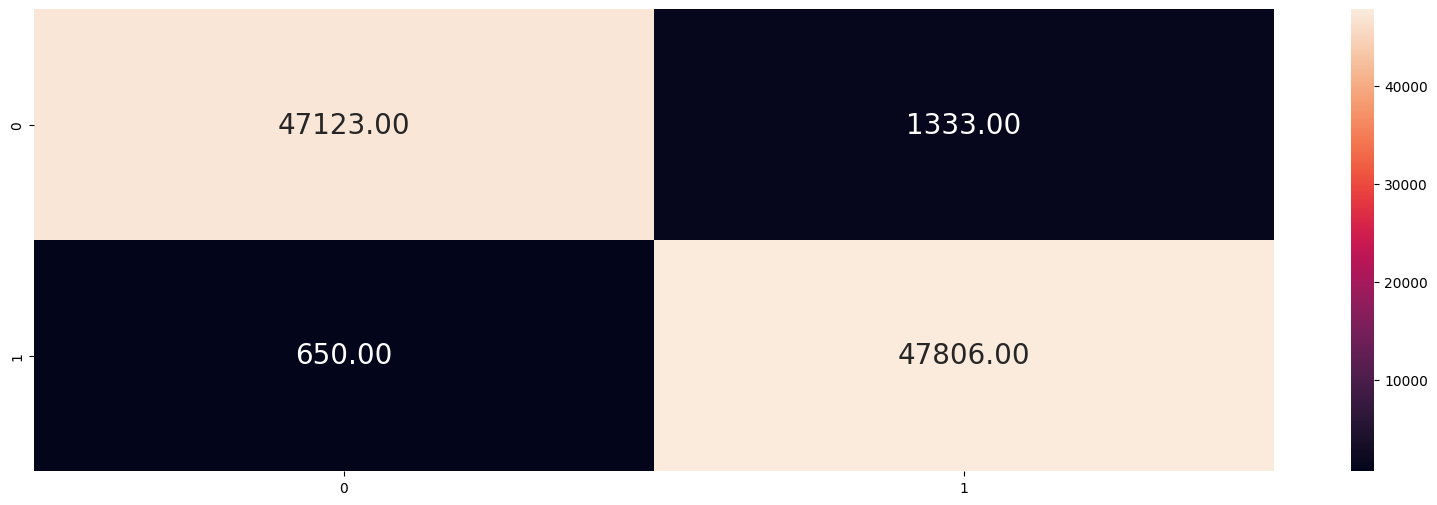

In [100]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

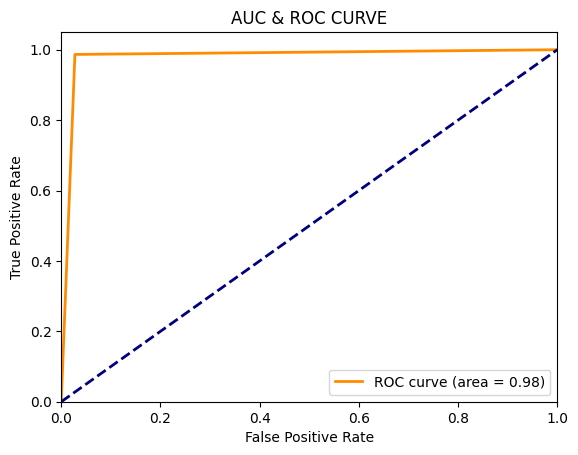

In [101]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [102]:
y_pred = boost.predict(x_test)
acc_boost = accuracy_score(y_test, y_pred) * 100
pre_boost = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_boost = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_boost = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_boost}%")
print(f"Precision : {pre_boost}%")
print(f"Recall : {recall_boost}%")
print(f"F1 Score : {f1_boost}%")

Accuracy: 97.82587759426012%
Precision : 97.84049469991547%
Recall : 97.82587759426012%
F1 Score : 97.82571151213266%


<Axes: >

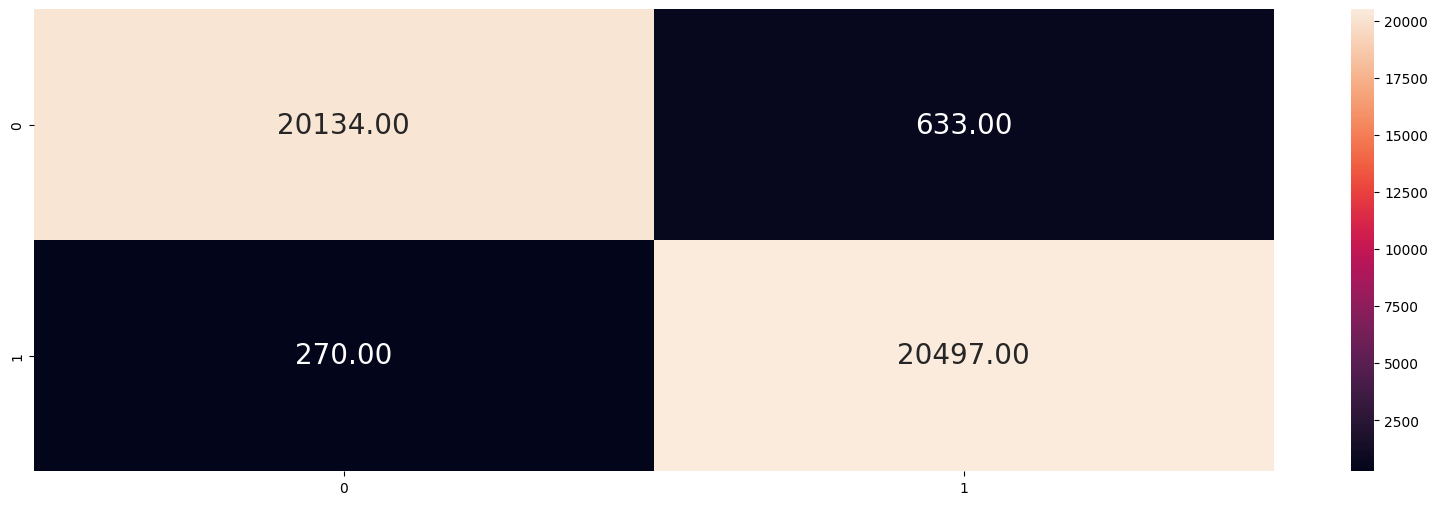

In [103]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

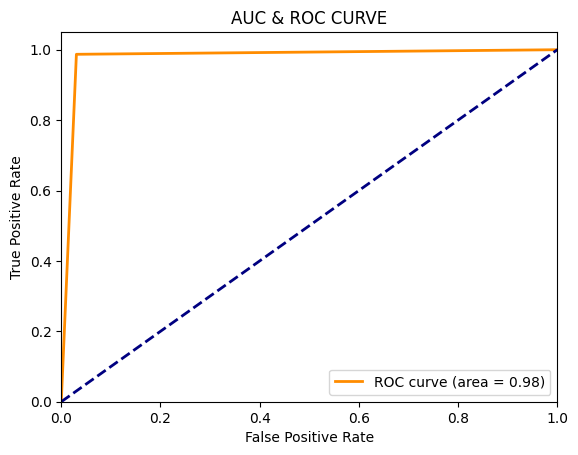

In [104]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **Accuracy Graph**

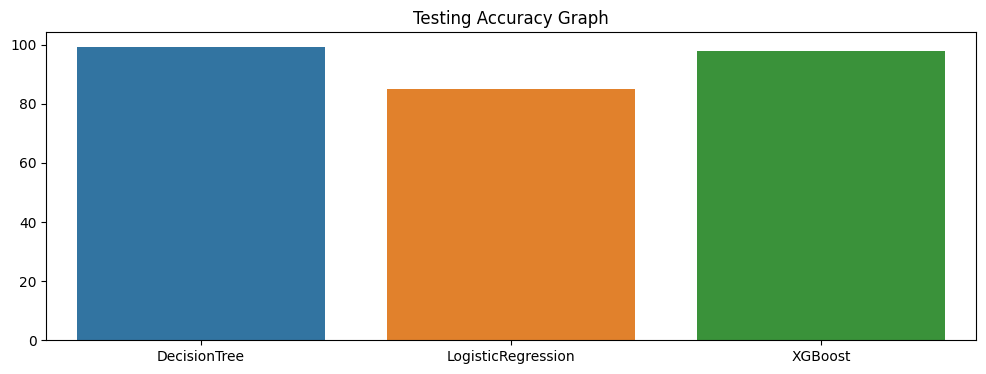

In [106]:
Algorithum = ['DecisionTree', 'LogisticRegression', 'XGBoost']
Accuracy = [acc_dt, acc_lr, acc_boost]

plt.figure(figsize=(12,4))
sns.barplot(x = Algorithum, y = Accuracy)
plt.title("Testing Accuracy Graph")
plt.show()

## **Prediction**

In [125]:
x_test.head(3)

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min
571,47987,5228,6,39044,0.000000,51.224260,39044.000000,0.000000,39044,39044,0.0000,0.000000,0,0,0.000000,0.000000,0,0
6296,49524,80,6,28191,0.000000,70.944628,28191.000000,0.000000,28191,28191,0.0000,0.000000,0,0,0.000000,0.000000,0,0
129431,443,49580,6,4993143,25991.823825,86.514480,11585.768201,13303.298979,44585,90,21113.8721,11464.233436,44846,184,25671.497867,9648.416127,44840,373


In [109]:
y_test.head()

571       0
6296      0
129431    1
1875      0
84244     1
Name: label, dtype: int64

In [123]:
x_train.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min'],
      dtype='object')

In [124]:
import pandas as pd
import numpy as np
import xgboost as xgb

# Assuming x_train is a DataFrame or array with columns like [' Source Port', ' Destination Port', ...]
# inp is a list containing your input data
inp = [[47987, 5228, 6, 39044, 0.0, 51.224260, 39044.0, 0.0, 39044, 39044, 0.0, 0.0, 0, 0, 0.0, 0.0, 0, 0]]

# Create a DataFrame with inp and feature_names
inp_df = pd.DataFrame(inp, columns=x_train.columns)

# Initialize the XGBClassifier
boost1 = xgb.XGBClassifier(random_state=42)

# Assuming x_train and y_train are your training data
boost1.fit(x_train, y_train)

# If you only want to predict with the provided input:
Result = boost1.predict(inp_df)

# Print or use the prediction result
print(Result)


[0]


In [126]:


import pandas as pd
import numpy as np
import xgboost as xgb

# Assuming x_train is a DataFrame or array with columns like [' Source Port', ' Destination Port', ...]
# inp is a list containing your input data
inp1 = [[443, 49580, 6, 4993143, 25991.823825, 86.514480, 11585.768201, 13303.298979, 44585, 90, 21113.8721, 11464.233436, 44846, 184, 25671.497867, 9648.416127, 44840, 373]]

# Create a DataFrame with inp and feature_names
inp_df = pd.DataFrame(inp1, columns=x_train.columns)

# Initialize the XGBClassifier
boost1 = xgb.XGBClassifier(random_state=42)

# Assuming x_train and y_train are your training data
boost1.fit(x_train, y_train)

# If you only want to predict with the provided input:
Result = boost1.predict(inp_df)

# Print or use the prediction result
print(Result)


[1]


### **Existing Model**

**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(x_train)
acc_rf = accuracy_score(y_train, y_pred) * 100
pre_rf = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_rf = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_rf = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_rf}%")
print(f"Precision : {pre_rf}%")
print(f"Recall : {recall_rf}%")
print(f"F1 Score : {f1_rf}%")

Accuracy: 99.99896813604094%
Precision : 99.99896815733538%
Recall : 99.99896813604094%
F1 Score : 99.99896813604083%


<Axes: >

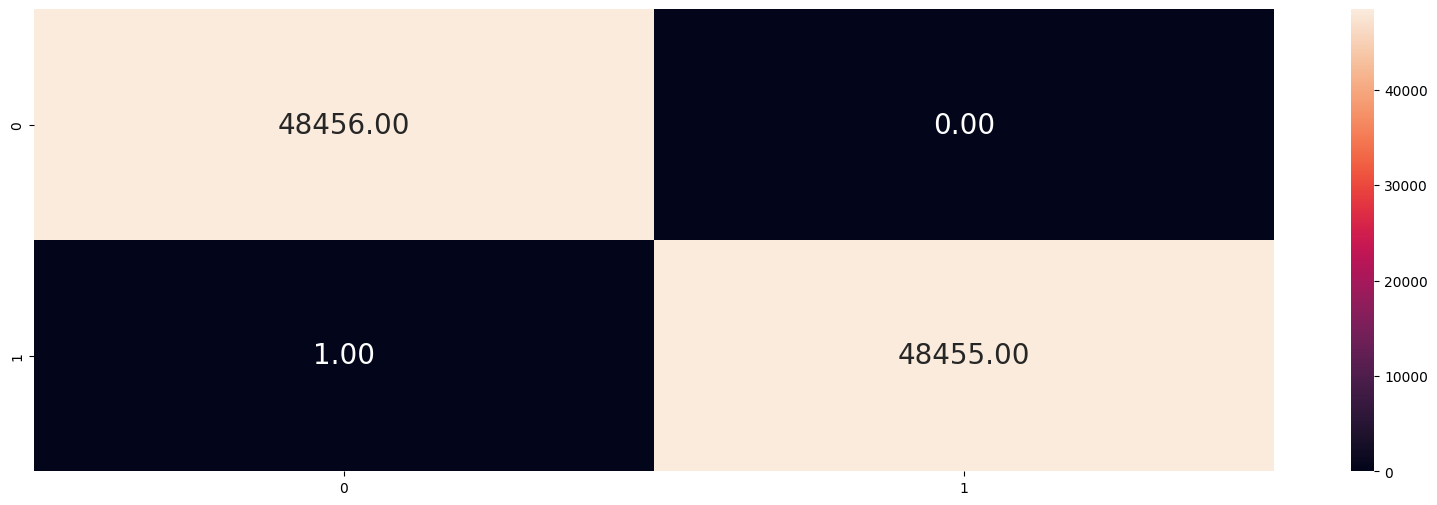

In [22]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

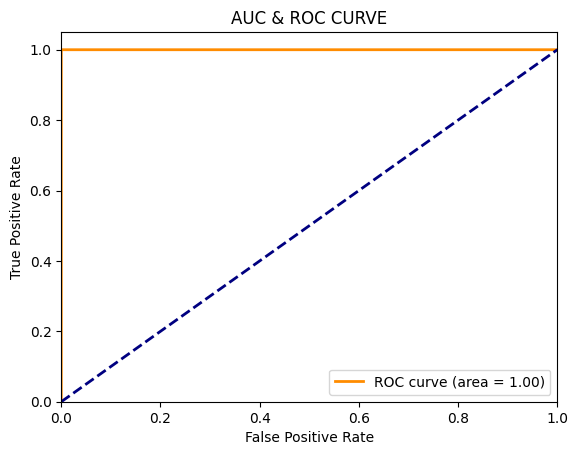

In [23]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [24]:
y_pred = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred) * 100
pre_rf = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_rf = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_rf = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_rf}%")
print(f"Precision : {pre_rf}%")
print(f"Recall : {recall_rf}%")
print(f"F1 Score : {f1_rf}%")

Accuracy: 99.5305051283286%
Precision : 99.53087827383365%
Recall : 99.5305051283286%
F1 Score : 99.53050424408104%


<Axes: >

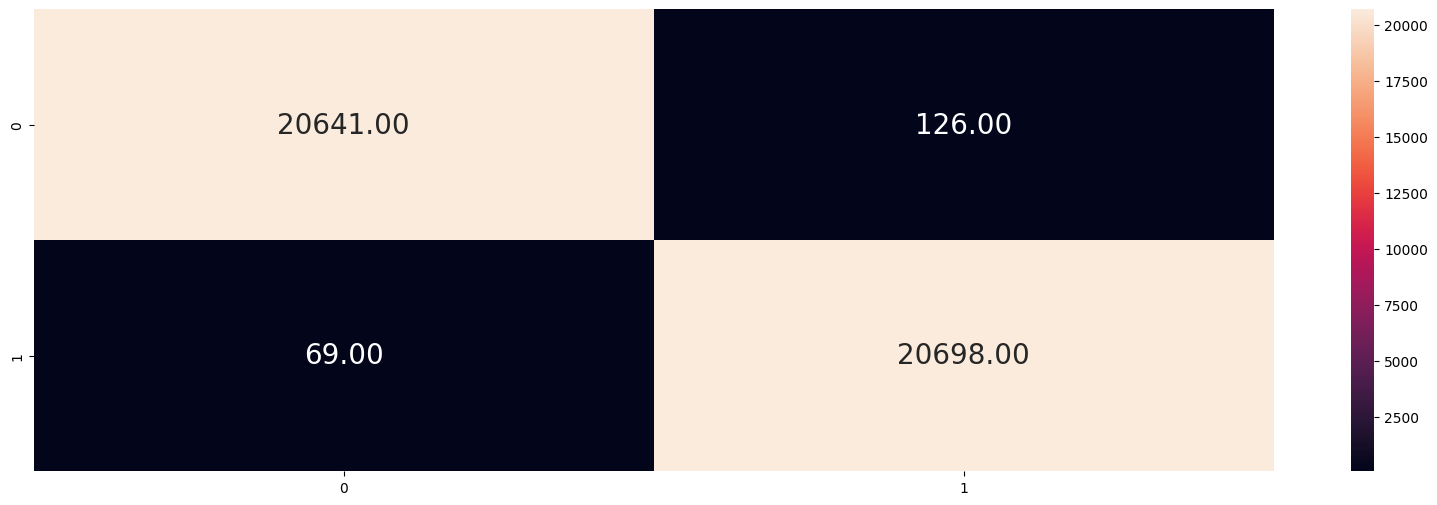

In [25]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

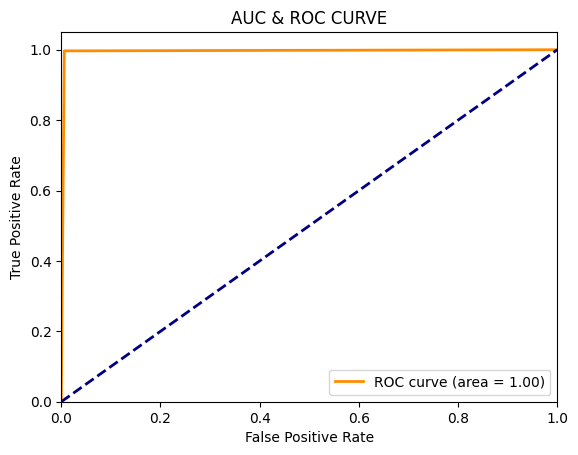

In [26]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**CNN**

In [28]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

# Ensure your data is in NumPy array format
X_train_np = x_train.values
X_test_np = x_test.values

# Reshape data for CNN input (samples, timesteps, features)
X_train_cnn = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)
X_test_cnn = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)

# Building the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
2423/2423 [==============================] - 13s 5ms/step - loss: 2823.8823 - accuracy: 0.6754 - val_loss: 0.7457 - val_accuracy: 0.7202
Epoch 2/100
2423/2423 [==============================] - 13s 5ms/step - loss: 13.0119 - accuracy: 0.6581 - val_loss: 0.5932 - val_accuracy: 0.6324
Epoch 3/100
2423/2423 [==============================] - 13s 5ms/step - loss: 3.1153 - accuracy: 0.6012 - val_loss: 0.6234 - val_accuracy: 0.5917
Epoch 4/100
2423/2423 [==============================] - 15s 6ms/step - loss: 1.8669 - accuracy: 0.5663 - val_loss: 0.6354 - val_accuracy: 0.5768
Epoch 5/100
2423/2423 [==============================] - 13s 5ms/step - loss: 1.1764 - accuracy: 0.5502 - val_loss: 0.6940 - val_accuracy: 0.4984
Epoch 6/100
2423/2423 [==============================] - 14s 6ms/step - loss: 1.4223 - accuracy: 0.5171 - val_loss: 0.6923 - val_accuracy: 0.5027
Epoch 7/100
2423/2423 [==============================] - 13s 5ms/step - loss: 1.2142 - accuracy: 0.5147 - val_loss: 0.69

In [29]:
# Evaluate the model on the test set
train_loss, train_loss_accuracy = model.evaluate(X_train_cnn, y_train)
print(f'Train Loss: {train_loss:.4f}')
print(f'Train Accuracy: {train_loss_accuracy:.4f}')

3029/3029 [==============================] - 8s 3ms/step - loss: 0.5897 - accuracy: 0.6360
Train Loss: 0.5897
Train Accuracy: 0.6360


In [30]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

1298/1298 [==============================] - 3s 2ms/step - loss: 0.5902 - accuracy: 0.6354
Test Loss: 0.5902
Test Accuracy: 0.6354


### **--------------------------------------------END-------------------------------------------------**